<a href="https://colab.research.google.com/github/Pobudi/python/blob/master/Data_analysis-wahing_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%pip install --upgrade plotly

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('data/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('data/monthly_deaths.csv', 
                      parse_dates=['date'])

In [ ]:
df_yearly.isna().values.any()

False

In [ ]:
df_yearly.year.duplicated().values.any()

True

### Check for Nan Values and Duplicates

In [ ]:
df_monthly.births.mean()

267.0

### Descriptive Statistics

In [ ]:
df_monthly.deaths.mean()

22.46938775510204

In [ ]:
death_percentages = (df_yearly["deaths"].sum()/df_yearly["births"].sum()*100).round(2)
death_percentages

7.08

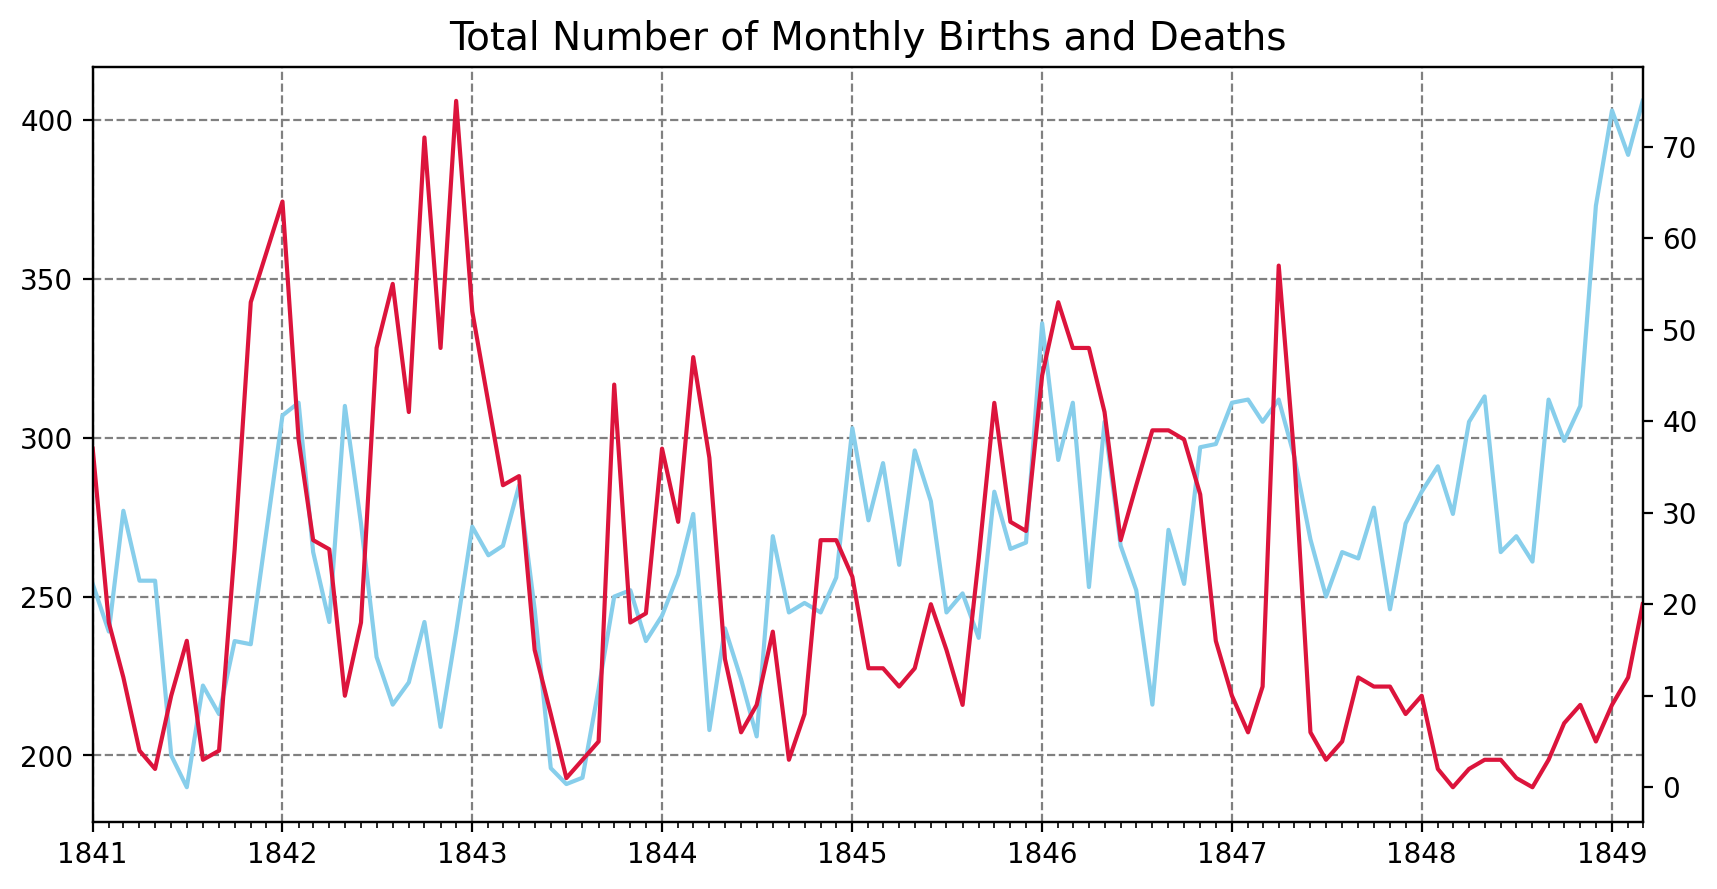

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
plt.title("Total Number of Monthly Births and Deaths", fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.grid(color="grey", linestyle="--")
ax1.plot(df_monthly.date, df_monthly.births, color="skyblue")
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_locator(years)

ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())

ax2.plot(df_monthly.date, df_monthly.deaths, color="crimson")

plt.show()

In [ ]:
line = px.line(df_yearly, 
                x='year', 
                y='births',
                color='clinic',
                title='Total Yearly Births by Clinic')
    
line.show()

In [ ]:
line = px.line(df_yearly, 
                x='year', 
                y='deaths',
                color='clinic',
                title='Total Yearly Births by Clinic')
    
line.show()

In [ ]:
df_yearly["pct_deaths"] = (df_yearly["deaths"]/df_yearly["births"]*100).round(2)
df_yearly.head(12)

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [ ]:
px.line(df_yearly, x="year", y="pct_deaths", color="clinic")

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [ ]:
df_monthly["pct_deaths"] = (df_monthly["deaths"]/df_monthly["births"]*100).round(2)

In [ ]:
df_monthly_before = df_monthly[df_monthly.date < handwashing_start]
df_monthly_after = df_monthly[df_monthly.date >= handwashing_start]

In [ ]:
print(f"average death rate before: {df_monthly_before.pct_deaths.mean().round(2)}")
print(f"average death rate after: {df_monthly_after.pct_deaths.mean().round(2)}")

average death rate before: 10.5
average death rate after: 2.11


In [ ]:
roll_df = df_monthly_before.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,11.13
1847-02-01,290.50,23.50,8.44
1847-03-01,296.17,18.83,6.64


In [ ]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [ ]:
t_stat, p_value = stats.ttest_ind(a=df_monthly_before.pct_deaths, 
                                    b=df_monthly_after.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002990
t-statstic is 5.511
